<a href="https://colab.research.google.com/github/trishnak99/ai_colab_2/blob/master/hw2_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set

## Loading the MNIST fashion data set

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

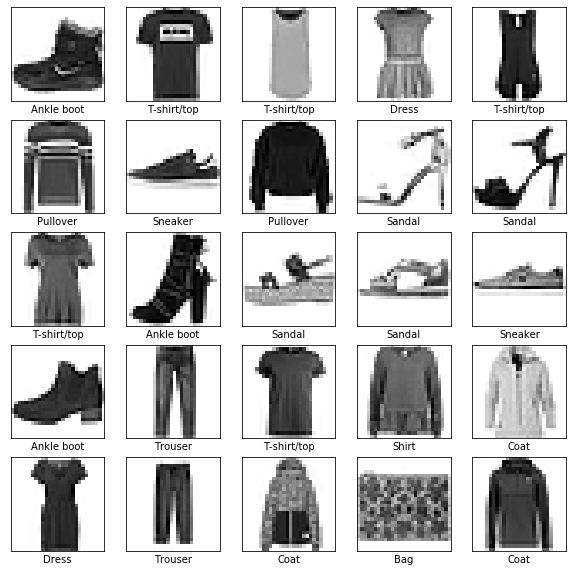

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

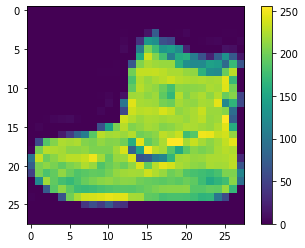

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Define graph functions


In [0]:
def graphAcc(history):
  history_dict = history.history
  acc_values = history_dict['acc']
  test_acc_values = history_dict['val_acc']
  epochs_range = range(1, epochs+1)

  plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def graphLoss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  test_loss_values = history_dict['val_loss']
  epochs_range = range(1, epochs + 1)
  
  plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
  plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

##Build underfit

In [7]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
    keras.layers.Dropout(0.35)
    
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 5.3385 - acc: 0.3893 - val_loss: 1.8864 - val_acc: 0.5902
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 4.3258 - acc: 0.4563 - val_loss: 1.8772 - val_acc: 0.6206
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 4.1869 - acc: 0.4683 - val_loss: 1.8321 - val_acc: 0.6345
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 4.0674 - acc: 0.4825 - val_loss: 1.8378 - val_acc: 0.6435
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 3.9901 - acc: 0.4886 - val_loss: 1.7683 - val_acc: 0.6697
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 3.9386 - acc: 0.4976 - val_loss: 1.7619 - val_acc: 0.6809
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 3.8745 - acc: 0.5066 - val_l

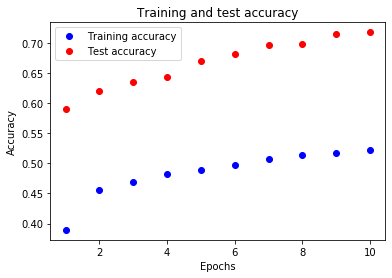

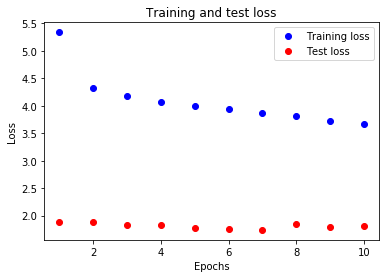

In [8]:
graphAcc(history)
graphLoss(history)

##Build overfit

In [9]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128*4, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4729 - acc: 0.8313 - val_loss: 0.4120 - val_acc: 0.8523
Epoch 2/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3602 - acc: 0.8683 - val_loss: 0.3764 - val_acc: 0.8669
Epoch 3/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3208 - acc: 0.8827 - val_loss: 0.3821 - val_acc: 0.8553
Epoch 4/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2984 - acc: 0.8901 - val_loss: 0.3568 - val_acc: 0.8756
Epoch 5/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2806 - acc: 0.8953 - val_loss: 0.3395 - val_acc: 0.8752
Epoch 6/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2666 - acc: 0.9001 - val_loss: 0.3188 - val_acc: 0.8879
Epoch 7/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2532 - acc: 0.9059 - val_l

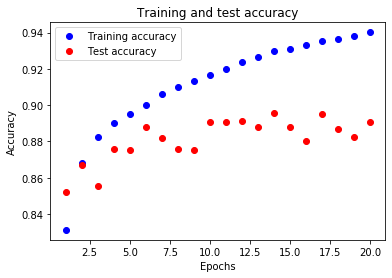

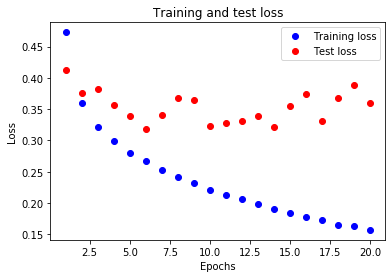

In [10]:
graphAcc(history)
graphLoss(history)

##Build good fit

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.21),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.22),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.23),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 134us/sample - loss: 0.6076 - acc: 0.7785 - val_loss: 0.4396 - val_acc: 0.8422
Epoch 2/15
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4540 - acc: 0.8364 - val_loss: 0.4119 - val_acc: 0.8509
Epoch 3/15
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4227 - acc: 0.8482 - val_loss: 0.3893 - val_acc: 0.8607
Epoch 4/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3996 - acc: 0.8543 - val_loss: 0.3968 - val_acc: 0.8540
Epoch 5/15
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3911 - acc: 0.8590 - val_loss: 0.3744 - val_acc: 0.8614
Epoch 6/15
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3734 - acc: 0.8628 - val_loss: 0.3673 - val_acc: 0.8689
Epoch 7/15
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3683 - acc: 0.8673 - val_l

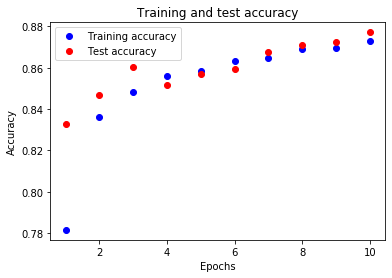

In [0]:
graphAcc(history)
graphLoss(history)

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

array([2.9914429e-11, 7.4761225e-11, 1.6990869e-12, 9.6232652e-16,
       1.2249764e-12, 9.5190110e-08, 9.6787389e-10, 7.6151040e-04,
       2.6918827e-12, 9.9923837e-01], dtype=float32)

In [0]:
np.argmax(predictions[index])

9

In [0]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

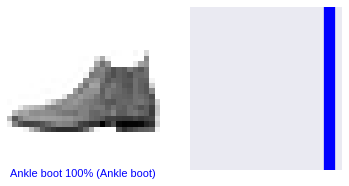

In [0]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


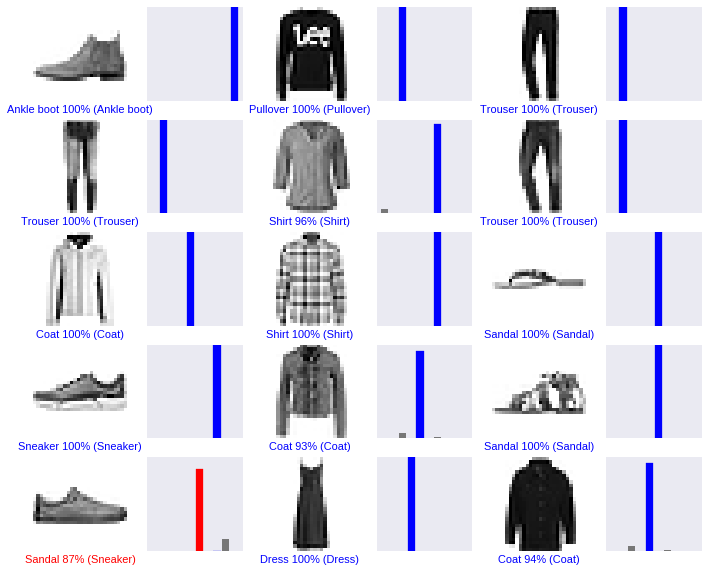

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [0]:
index = 0
test_image = test_images[index]
print(test_image.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

[[2.9914373e-11 7.4761225e-11 1.6990804e-12 9.6231921e-16 1.2249648e-12
  9.5189570e-08 9.6787389e-10 7.6151005e-04 2.6918619e-12 9.9923837e-01]]


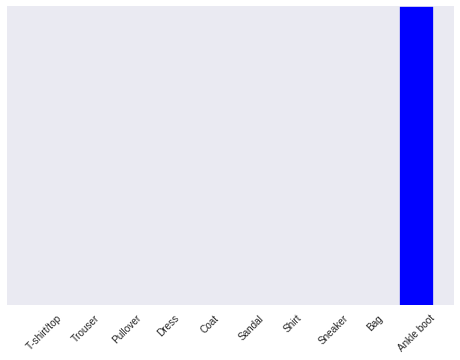

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

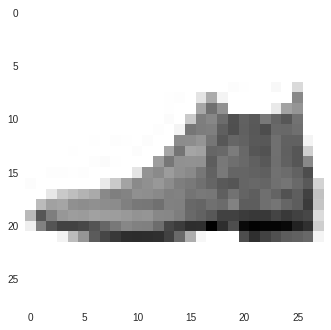

In [0]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [0]:
np.argmax(predictions_single[0])

9

In [0]:
test_labels[index]

9